# (3주차 DV) 3월 18일
> EDA

In [1]:
import pandas as pd

In [15]:
df_train = pd.read_csv('C:/Users/82103/Desktop/2022-1/머신러닝/data/train.csv')
df_test = pd.read_csv('C:/Users/82103/Desktop/2022-1/머신러닝/data/test.csv')

In [7]:
from pandas.core.groupby.generic import ScalarResult
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
df_train['SalePrice'].describe() ## 부동산 가격의 기술통계량

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

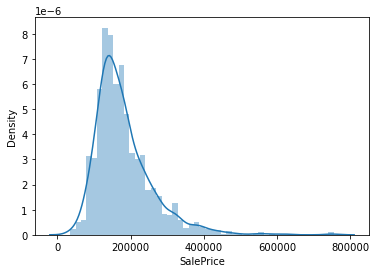

In [24]:
# histogram
sns.distplot(df_train['SalePrice'])

## line : kernel density plot
## 목표변수에 대한 히스토그램과 kernel density plot

In [23]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt()) ## 꼬리가 두터운 정도 (이상치가 많을수록 두꺼움)

Skewness: 1.882876
Kurtosis: 6.536282


- $-2\sim2$ 사이의 값이므로 치우침이 없는 데이터 (by. George & Mallery, 2010)
- 첨도가 높으면 (Kurtosis > 3) 이상치가 많이 있다는 것.

- 많은 통계기법들이 정규성을 가정한다.

- positive skewness : 오른쪽 꼬리, 왼쪽에 데이터가 많다.
- negative skewness : 왼쪽 꼬리, 오른쪽에 데이터가 많다.

***왜도, 첨도 읽어보기***

In [ ]:
## scatter plot -> 이상치가 있는지?

In [ ]:
## step 잘 기억!

In [56]:
#scatter plot grlivarea/saleprice
var1 = 'GrLivArea' # 지상 거실 면적 평방피트
data1 = pd.concat([df_train['SalePrice'], df_train[var1]], axis=1) ## 열로 합치기(axis=1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

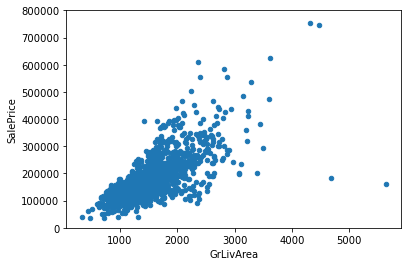

In [58]:
data1.plot.scatter(x=var1, y='SalePrice', ylim=(0,800000))

- linear relationship

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

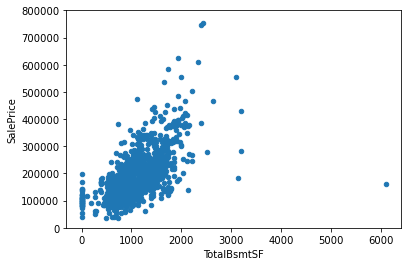

In [60]:
# scatter plot totalbsmtsf/salepriced
var2 = 'TotalBsmtSF' # 지하 총 평방 피트
data2 = pd.concat([df_train['SalePrice'], df_train[var2]], axis=1) # 열기준으로 붙임
data2.plot.scatter(x=var2, y='SalePrice', ylim=(0,800000))

- 더 strong 한 linear relationship ( 더 가파르다. )

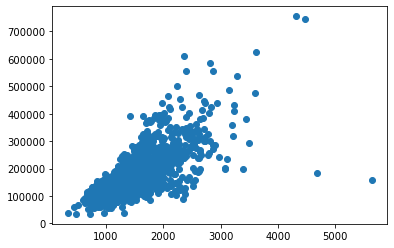

In [50]:
var1 = 'GrLivArea'
data1 = pd.concat([df_train['SalePrice'], df_train[var1]], axis=1)
plt.scatter(var1, y='SalePrice', data = data1)

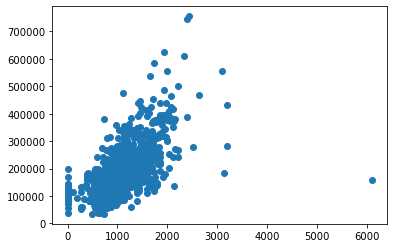

In [49]:
var2 = 'TotalBsmtSF'
data2 = pd.concat([df_train['SalePrice'], df_train[var2]], axis=1)
plt.scatter(var2, y='SalePrice', data = data2)

In [47]:
data2

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


(-0.5, 9.5, 0.0, 800000.0)

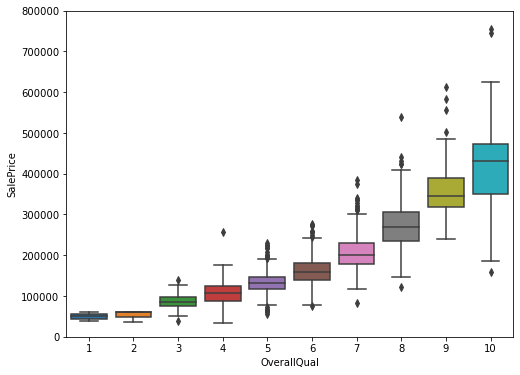

In [62]:
## box plot overallqual/saleprice
var3 = 'OverallQual' # 전체 제료 및 마감품질
data3 = pd.concat([df_train['SalePrice'], df_train[var3]], axis=1) # 열로 합치기
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var3, y="SalePrice", data=data3)
fig.axis(ymin=0, ymax=800000)

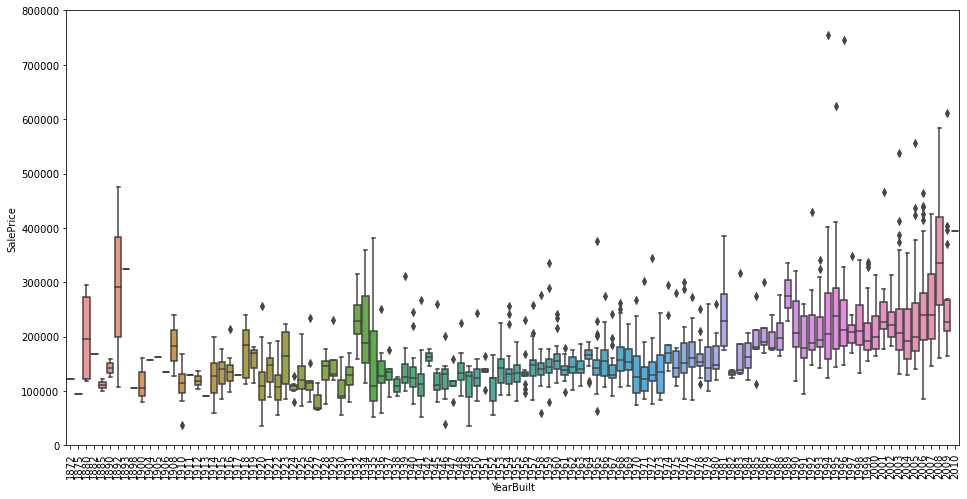

In [64]:
var4 = 'YearBuilt' #  원래 건설 날짜
data4 = pd.concat([df_train['SalePrice'], df_train[var4]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var4, y="SalePrice", data=data4)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90) # x축 눈금 값 90도 회전.